## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3         X4           Y
0  83.183152   463.237914  0.639561   8.223712  307.619958
1  50.336824  1718.999218  0.492129   2.107662  847.535864
2   4.942113   286.170935  0.027899  10.078915    9.198402
3  39.159337  1124.380045  0.110699   8.365833  130.405729
4  75.252751  1219.180751  0.664635   5.264215  813.742418


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0117126	total: 57.1ms	remaining: 57s
1:	learn: 0.9996867	total: 57.7ms	remaining: 28.8s
2:	learn: 0.9892055	total: 58.2ms	remaining: 19.3s
3:	learn: 0.9752737	total: 58.7ms	remaining: 14.6s
4:	learn: 0.9609183	total: 59.1ms	remaining: 11.8s
5:	learn: 0.9495650	total: 59.7ms	remaining: 9.89s
6:	learn: 0.9361783	total: 60.3ms	remaining: 8.55s
7:	learn: 0.9232434	total: 60.7ms	remaining: 7.53s
8:	learn: 0.9102652	total: 61.3ms	remaining: 6.75s
9:	learn: 0.8984104	total: 61.8ms	remaining: 6.12s
10:	learn: 0.8876211	total: 62.2ms	remaining: 5.59s
11:	learn: 0.8743838	total: 62.5ms	remaining: 5.15s
12:	learn: 0.8623336	total: 63ms	remaining: 4.79s
13:	learn: 0.8490281	total: 63.5ms	remaining: 4.47s
14:	learn: 0.8364246	total: 63.8ms	remaining: 4.19s
15:	learn: 0.8258754	total: 64.2ms	remaining: 3.94s
16:	learn: 0.8148582	total: 64.5ms	remaining: 3.73s
17:	learn: 0.8053124	total: 65ms	remaining: 3.54s
18:	learn: 0.7973445	total: 65.4ms	remaining: 3.38

103:	learn: 0.2860763	total: 106ms	remaining: 911ms
104:	learn: 0.2829347	total: 106ms	remaining: 906ms
105:	learn: 0.2794983	total: 107ms	remaining: 900ms
106:	learn: 0.2759554	total: 107ms	remaining: 895ms
107:	learn: 0.2726988	total: 108ms	remaining: 890ms
108:	learn: 0.2699041	total: 108ms	remaining: 885ms
109:	learn: 0.2671958	total: 109ms	remaining: 878ms
110:	learn: 0.2641971	total: 109ms	remaining: 873ms
111:	learn: 0.2618550	total: 109ms	remaining: 867ms
112:	learn: 0.2592649	total: 110ms	remaining: 861ms
113:	learn: 0.2564154	total: 110ms	remaining: 857ms
114:	learn: 0.2538232	total: 111ms	remaining: 852ms
115:	learn: 0.2513529	total: 111ms	remaining: 846ms
116:	learn: 0.2485507	total: 111ms	remaining: 841ms
117:	learn: 0.2458362	total: 112ms	remaining: 838ms
118:	learn: 0.2436188	total: 113ms	remaining: 833ms
119:	learn: 0.2410458	total: 113ms	remaining: 828ms
120:	learn: 0.2387594	total: 113ms	remaining: 824ms
121:	learn: 0.2363132	total: 114ms	remaining: 819ms
122:	learn: 

278:	learn: 0.0654878	total: 187ms	remaining: 483ms
279:	learn: 0.0651153	total: 188ms	remaining: 482ms
280:	learn: 0.0647394	total: 188ms	remaining: 481ms
281:	learn: 0.0642480	total: 188ms	remaining: 480ms
282:	learn: 0.0638084	total: 189ms	remaining: 479ms
283:	learn: 0.0634514	total: 189ms	remaining: 477ms
284:	learn: 0.0631124	total: 190ms	remaining: 476ms
285:	learn: 0.0627041	total: 190ms	remaining: 474ms
286:	learn: 0.0622897	total: 191ms	remaining: 473ms
287:	learn: 0.0619224	total: 191ms	remaining: 472ms
288:	learn: 0.0614818	total: 192ms	remaining: 471ms
289:	learn: 0.0610485	total: 192ms	remaining: 470ms
290:	learn: 0.0606539	total: 192ms	remaining: 469ms
291:	learn: 0.0602371	total: 193ms	remaining: 468ms
292:	learn: 0.0598186	total: 194ms	remaining: 467ms
293:	learn: 0.0594993	total: 194ms	remaining: 466ms
294:	learn: 0.0592205	total: 195ms	remaining: 465ms
295:	learn: 0.0588316	total: 195ms	remaining: 464ms
296:	learn: 0.0585022	total: 196ms	remaining: 463ms
297:	learn: 

494:	learn: 0.0253605	total: 289ms	remaining: 294ms
495:	learn: 0.0252729	total: 289ms	remaining: 294ms
496:	learn: 0.0251592	total: 290ms	remaining: 293ms
497:	learn: 0.0250695	total: 290ms	remaining: 292ms
498:	learn: 0.0250333	total: 291ms	remaining: 292ms
499:	learn: 0.0249471	total: 291ms	remaining: 291ms
500:	learn: 0.0249117	total: 292ms	remaining: 290ms
501:	learn: 0.0247986	total: 292ms	remaining: 290ms
502:	learn: 0.0246891	total: 293ms	remaining: 289ms
503:	learn: 0.0246028	total: 293ms	remaining: 288ms
504:	learn: 0.0245684	total: 293ms	remaining: 287ms
505:	learn: 0.0244431	total: 294ms	remaining: 287ms
506:	learn: 0.0243133	total: 294ms	remaining: 286ms
507:	learn: 0.0241932	total: 295ms	remaining: 286ms
508:	learn: 0.0240687	total: 295ms	remaining: 285ms
509:	learn: 0.0239535	total: 296ms	remaining: 284ms
510:	learn: 0.0238549	total: 296ms	remaining: 284ms
511:	learn: 0.0237363	total: 297ms	remaining: 283ms
512:	learn: 0.0236407	total: 297ms	remaining: 282ms
513:	learn: 

669:	learn: 0.0138375	total: 369ms	remaining: 182ms
670:	learn: 0.0137833	total: 369ms	remaining: 181ms
671:	learn: 0.0137165	total: 370ms	remaining: 181ms
672:	learn: 0.0136902	total: 370ms	remaining: 180ms
673:	learn: 0.0136566	total: 371ms	remaining: 179ms
674:	learn: 0.0136043	total: 371ms	remaining: 179ms
675:	learn: 0.0135724	total: 372ms	remaining: 178ms
676:	learn: 0.0135197	total: 372ms	remaining: 178ms
677:	learn: 0.0134883	total: 373ms	remaining: 177ms
678:	learn: 0.0134558	total: 373ms	remaining: 176ms
679:	learn: 0.0134094	total: 374ms	remaining: 176ms
680:	learn: 0.0133787	total: 374ms	remaining: 175ms
681:	learn: 0.0133272	total: 374ms	remaining: 175ms
682:	learn: 0.0132637	total: 375ms	remaining: 174ms
683:	learn: 0.0132382	total: 375ms	remaining: 173ms
684:	learn: 0.0131979	total: 376ms	remaining: 173ms
685:	learn: 0.0131663	total: 376ms	remaining: 172ms
686:	learn: 0.0131355	total: 377ms	remaining: 172ms
687:	learn: 0.0130910	total: 377ms	remaining: 171ms
688:	learn: 

887:	learn: 0.0066596	total: 471ms	remaining: 59.4ms
888:	learn: 0.0066327	total: 471ms	remaining: 58.8ms
889:	learn: 0.0066104	total: 472ms	remaining: 58.3ms
890:	learn: 0.0065944	total: 472ms	remaining: 57.8ms
891:	learn: 0.0065760	total: 473ms	remaining: 57.2ms
892:	learn: 0.0065606	total: 473ms	remaining: 56.7ms
893:	learn: 0.0065299	total: 474ms	remaining: 56.2ms
894:	learn: 0.0065123	total: 474ms	remaining: 55.6ms
895:	learn: 0.0064866	total: 475ms	remaining: 55.1ms
896:	learn: 0.0064688	total: 475ms	remaining: 54.5ms
897:	learn: 0.0064517	total: 476ms	remaining: 54ms
898:	learn: 0.0064217	total: 476ms	remaining: 53.5ms
899:	learn: 0.0064043	total: 477ms	remaining: 52.9ms
900:	learn: 0.0063876	total: 477ms	remaining: 52.4ms
901:	learn: 0.0063711	total: 477ms	remaining: 51.9ms
902:	learn: 0.0063449	total: 478ms	remaining: 51.3ms
903:	learn: 0.0063156	total: 478ms	remaining: 50.8ms
904:	learn: 0.0062994	total: 479ms	remaining: 50.3ms
905:	learn: 0.0062748	total: 480ms	remaining: 49

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

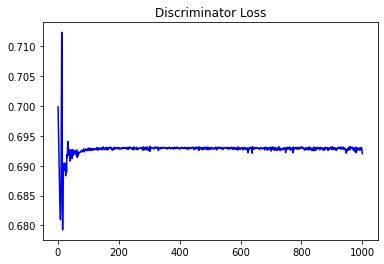

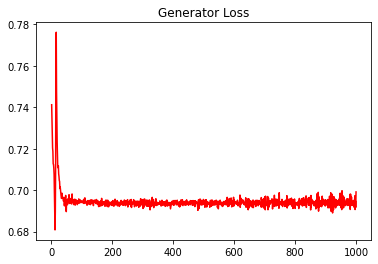

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.008320350945456537


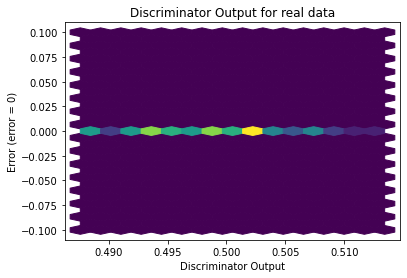

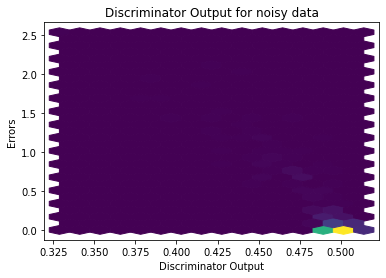

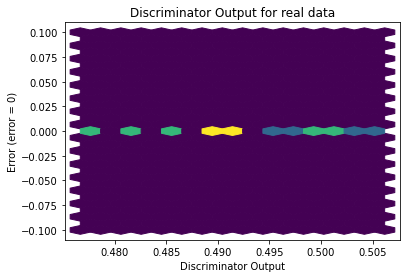

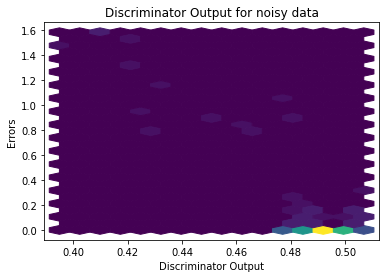

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


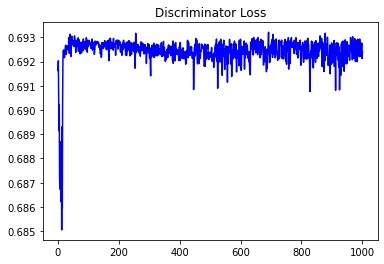

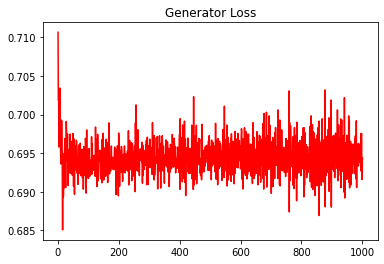

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.0050346431435486


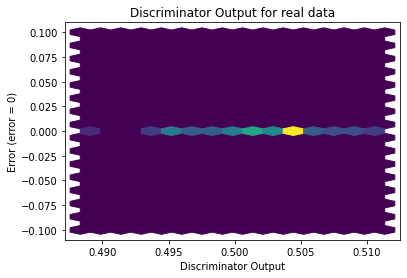

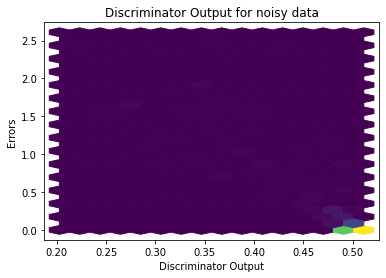

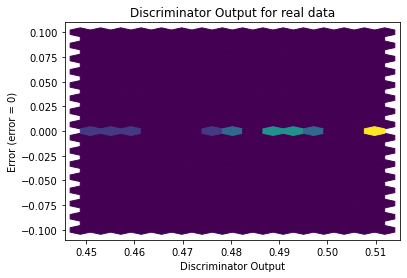

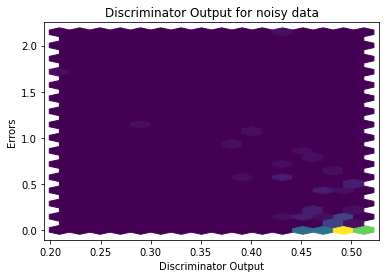

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.3432]], requires_grad=True)
